## Selecting Synchrotron Extraction Energy

Arguments:
- Files

Returns:
- Calibration coefficient

## Necessary Libraries

In [2]:
import glob
import pandas as pd
import random
import paho.mqtt.client as mqtt
import string
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d, CubicSpline, lagrange

In [3]:
x = np.array([70, 172, 374, 617, 780]) #8 new variables to process initial input
y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])

Enter the extraction beam energy: 700
Enter the number of data points: 2200


Text(0, 0.5, 'Calibration Coefficient [mVs/proton]')

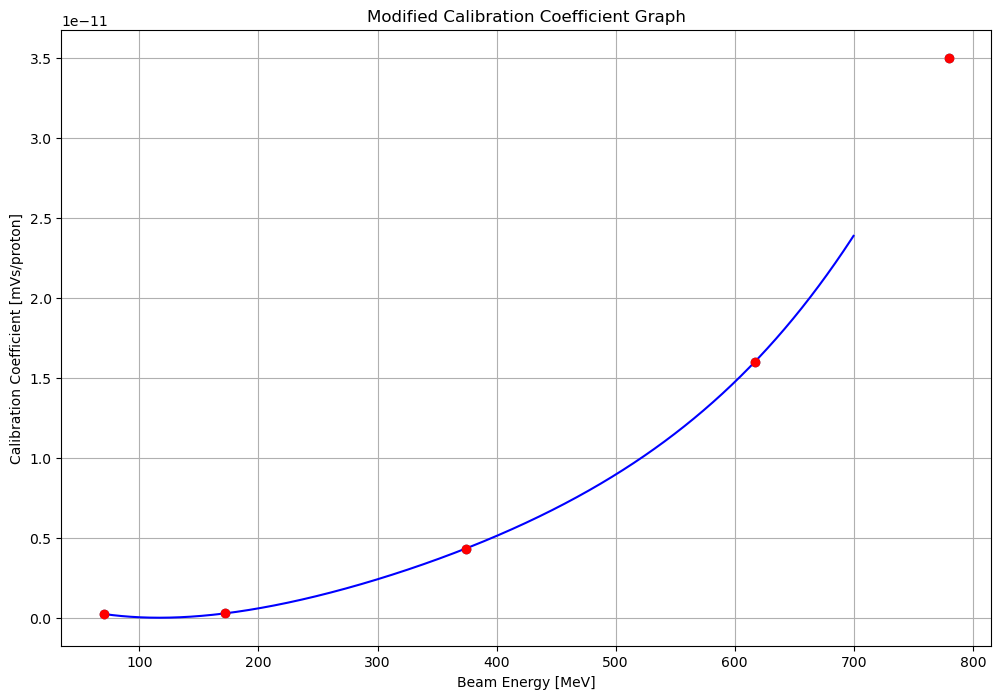

In [4]:
inpt1 = int(input("Enter the extraction beam energy: "))
inpt_x_array = [70, 780] #initiated for the input above 
y_array = [2.22E-13, 3.50E-11]
inpt_x_array.append(inpt1) #creates maximum value

def divided_diff(inpt_x_array, y_array): #function to calculate the divided differences table
    n = len(y_array)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, mstime, inpt_x_array): #evaluate the newton polynomial at x
    n = len(mstime) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (inpt_x_array -mstime[n-k])*p
    return p

def calibration_curve_beta(data_points, x, y, x_new): 
    #x = np.array([70, 172, 374, 617, 780])
    #y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
    a_s = divided_diff(x, y)[0, :]
    #x_new = np.linspace(70, 780, data_points) 
    return newton_poly(a_s, x, x_new)

data_points = int(input('Enter the number of data points: '))
x_new = np.linspace(70, 780, data_points)
calibration_curve_beta(data_points, x, y, x_new)
x_new_inpt = np.arange(70, inpt1, ((inpt1-70) / data_points))
f = lagrange(x, y)
y_new = f(x_new)
y_new_inpt = f(x_new_inpt)
plt.figure(figsize = (12, 8))
#plt.plot(x_new, y_new, 'g', label='Predicted Calibration Curve')
plt.plot(x_new_inpt, y_new_inpt, 'b', label='Calibration Curve')
plt.plot(x, y, 'ro')
plt.scatter(x, y)
#plt.legend()
plt.grid()
plt.title('Modified Calibration Coefficient Graph')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mVs/proton]')

[-55.        -54.6384778 -54.2769556 ... 799.2769556 799.6384778
 800.       ]
[1.68270081e-12 1.67172282e-12 1.66078754e-12 ... 3.83407765e-11
 3.84018425e-11 3.84629996e-11]
64.30232558139535 -1.0771186592428042e-14
64.66384778012684 -1.109698251145596e-14
65.02536997885835 -1.1399562932017246e-14
65.38689217758984 -1.1678973960465197e-14
65.74841437632135 -1.1935261624898159e-14
66.10993657505286 -1.2168471875159831e-14
66.47145877378435 -1.2378650582838858e-14
66.83298097251586 -1.2565843541269237e-14
67.19450317124735 -1.2730096465530065e-14
67.55602536997885 -1.2871454992445637e-14
67.91754756871036 -1.2989964680585401e-14
68.27906976744185 -1.3085671010263851e-14
68.64059196617336 -1.3158619383540935e-14
69.00211416490485 -1.3208855124221598e-14
69.36363636363636 -1.3236423477855885e-14
69.72515856236787 -1.3241369611739142e-14
70.08668076109936 -1.3223738614911865e-14
70.44820295983087 -1.3183575498159698e-14
70.80972515856236 -1.3120925194013438e-14
71.17124735729386 -1.303583

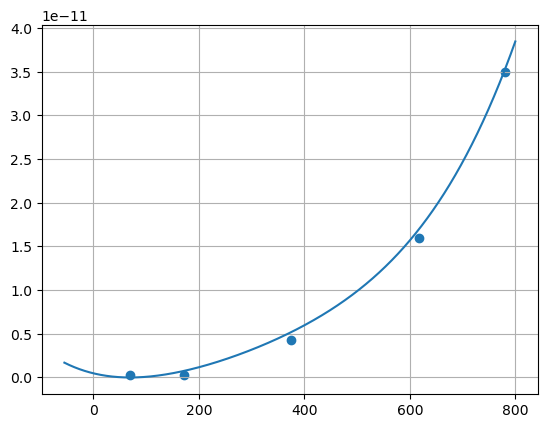

In [5]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

def calibration_curve_beta(data_points): 
    x = np.array([70, 172, 374, 617, 780])
    y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])

    a_s = divided_diff(x, y)[0, :]
    x_new = np.linspace(0, 800, data_points) 
    return newton_poly(a_s, x, x_new)

x = np.array([70, 172, 374, 617, 780])
y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])

a_s = divided_diff(x, y)[0, :]

# changes datapoints and startpoint of graph, so curve is positive after first array value 
# and has 2200 datapoints after first array value, for loop helps to identify where y value turns positive
# so it can be tuned as accurately as possible to the dataset


data_points = 2366
x_data = np.linspace(-55, 800, data_points)
print(x_data)
print(calibration_curve_beta(len(x_data)))
plt.grid()
plt.plot(x_data, calibration_curve_beta(len(x_data)))
plt.scatter(x,y)
len(x_data)
for i in range(330, 350):
    print(x_data[i], calibration_curve_beta(len(x_data))[i])

Enter the extraction beam energy: 700


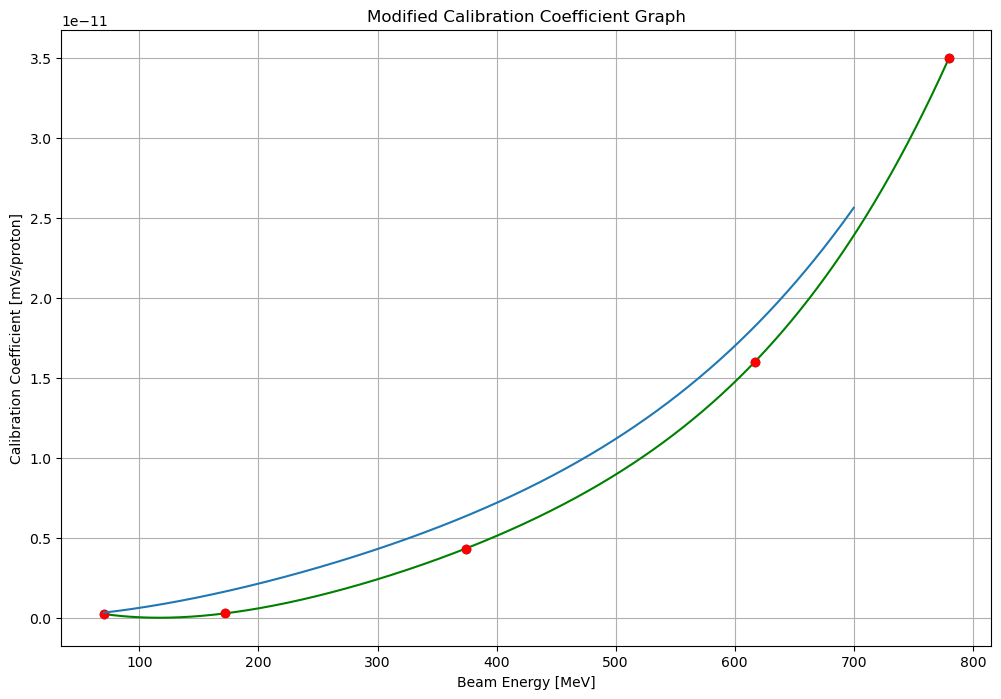

In [14]:
inpt1 = int(input("Enter the extraction beam energy: "))
inpt_x_array = [-55, 780] #initiated for the input above 
y_array = [2.22E-13, 3.50E-11]
inpt_x_array.append(inpt1) #creates maximum value

def divided_diff(inpt_x_array, y_array): #function to calculate the divided differences table
    n = len(y_array)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, mstime, inpt_x_array): #evaluate the newton polynomial at x
    n = len(mstime) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (inpt_x_array -mstime[n-k])*p
    return p

def calibration_curve_beta(data_points, x, y): 
    #x = np.array([70, 172, 374, 617, 780])
    #y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
    a_s = divided_diff(x, y)[0, :]
    x_new = np.linspace(70, 800, data_points) 
    return newton_poly(a_s, x, x_new)

data_points = 2366
x_data = np.linspace(-55, 800, data_points)
y_data = calibration_curve_beta(len(x_data), x, y)
x_new_inpt = np.linspace(70, inpt1, data_points)
f = lagrange(x, y)
y_new_inpt = f(x_new_inpt)
plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new, 'g', label='Predicted Calibration Curve')
#plt.plot(x_new_inpt, y_new_inpt, 'r', label='Calibration Curve')
#plt.xlim(70, inpt1)
#plt.plot(x_data, y_data)
plt.plot(x, y, 'ro')
plt.scatter(x, y)
plt.grid()
plt.title('Modified Calibration Coefficient Graph')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mVs/proton]')
energyData = []
x_array = []
y_array = []
# for i in range(data_points):
#     if (x_data[i] > 70) and (x_data[i] < inpt1):
#         energyData.append([x_data[i], y_data[i]])
# print(energyData)
for i in range(data_points):
    if (x_data[i] > 70) and (x_data[i] < inpt1):
        x_array.append(x_data[i])
        y_array.append(y_data[i])
plt.plot(x_array, y_array)

In [ ]:
inpt1 = int(input("Enter the extraction beam energy: "))
inpt_x_array = [-55, 780] #initiated for the input above 
y_array = [2.22E-13, 3.50E-11]
inpt_x_array.append(inpt1) #creates maximum value

def divided_diff(inpt_x_array, y_array): #function to calculate the divided differences table
    n = len(y_array)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, mstime, inpt_x_array): #evaluate the newton polynomial at x
    n = len(mstime) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (inpt_x_array -mstime[n-k])*p
    return p

def calibration_curve_beta(data_points, x, y): 
    #x = np.array([70, 172, 374, 617, 780])
    #y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
    a_s = divided_diff(x, y)[0, :]
    x_new = np.linspace(70, 800, data_points) 
    return newton_poly(a_s, x, x_new)

data_points = 2366
x_data = np.linspace(-55, 800, data_points)
y_data = calibration_curve_beta(len(x_data), x, y)
x_new_inpt = np.linspace(70, inpt1, data_points)
f = lagrange(x, y)
y_new_inpt = f(x_new_inpt)
plt.figure(figsize = (12, 8))
#plt.plot(x_new, y_new, 'g', label='Predicted Calibration Curve')
#plt.plot(x_new_inpt, y_new_inpt, 'b', label='Calibration Curve')
#plt.xlim(70, inpt1)
#plt.plot(x_data, y_data)
plt.plot(x, y, 'ro')
plt.scatter(x, y)
plt.grid()
plt.title('Modified Calibration Coefficient Graph')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mVs/proton]')
energyData = []
x_array = []
y_array = []
# for i in range(data_points):
#     if (x_data[i] > 70) and (x_data[i] < inpt1):
#         energyData.append([x_data[i], y_data[i]])
# print(energyData)
for i in range(data_points):
    if (x_data[i] > 70) and (x_data[i] < inpt1):
        x_array.append(x_data[i])
        y_array.append(y_data[i])
plt.plot(x_array, y_array)